<a href="https://colab.research.google.com/github/Bhasker-Paul/Breast-Cancer/blob/main/Breast_Cancer_Wisconsin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Library

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,precision_score,recall_score
from sklearn.feature_selection import SelectKBest,f_classif
from sklearn.feature_selection import chi2
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold, cross_val_score
from sklearn.preprocessing import MinMaxScaler,StandardScaler






# **Exploratory Data Analysis**

In [ ]:
df=pd.read_csv('/content/Breast Cancer Wisconsin - Breast Cancer Wisconsin.csv')

In [ ]:
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [ ]:
df.head(10)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
5,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,...,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440
6,844359,M,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,...,22.88,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368
7,84458202,M,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,...,17.06,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510
8,844981,M,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,...,15.49,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720
9,84501001,M,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,...,15.09,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750


In [ ]:
df.info() # check the integer, float, object variable of the data set

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [ ]:
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [ ]:
df.shape # check the rows & columns of the data set

(569, 32)

**Null Value Detection**

In [ ]:
df.isnull() # check the null value of the dataset

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
565,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
566,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
567,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


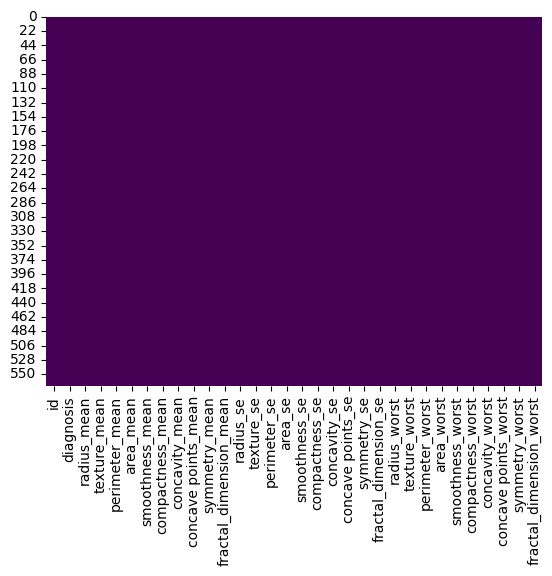

In [ ]:
sns.heatmap(df.isnull(), cbar=False, cmap="viridis") # Check the null values by heatmap diagram
plt.show()

**We check the null values & we did not find null values in the dataset**

In [ ]:
df.columns # check the columns name of the dataset

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

<ipython-input-11-f9dea614c09c>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot( x="diagnosis", y=None, data=df,palette="deep")


Text(0.5, 1.0, 'Diagnosis Distribution')

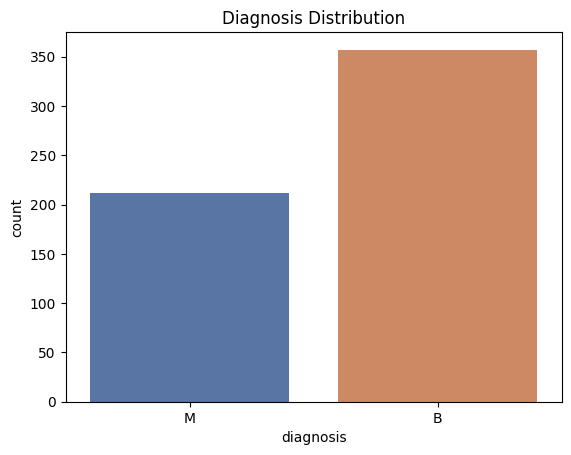

In [ ]:
sns.countplot( x="diagnosis", y=None, data=df,palette="deep")
plt.title('Diagnosis Distribution')

**When we see the diagnosis distribution, we can see that benign tumors count is higher than  malignant tumors**

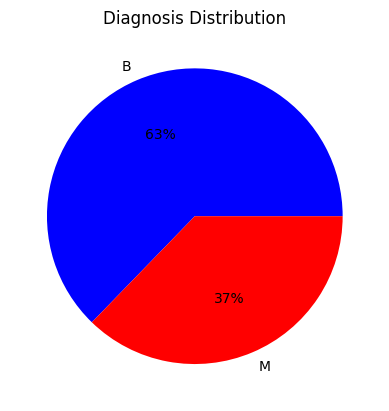

In [ ]:
Diagnosis_counts = df['diagnosis'].value_counts()
plt.pie(Diagnosis_counts, labels=Diagnosis_counts.index, colors='bright', autopct='%.0f%%') # Use Diagnosis_counts (capital D) here
plt.title('Diagnosis Distribution') # Adds a descriptive title to the chart
plt.show()

****

**When we see the pie chart, we can see that benign tumors  are 63%, Wherere is malignant tumors are 37%**

In [ ]:
sns.pairplot(df, hue="diagnosis")

# **Feature Selection**

In [ ]:
X = df.iloc[:, 2:].select_dtypes(include=['number'])  # Independent columns - Expand column selection
y = df.iloc[:, 1]  # Target column i.e., price range

# Apply SelectKBest to extract the top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=10) # If you still want to select top 10, ensure you have at least 10 features in X
fit = bestfeatures.fit(X, y)

# Get the selected feature names
selected_features = X.columns[bestfeatures.get_support()]

# Drop the unnecessary features from the original DataFrame
columns_to_keep = list(selected_features) + [df.columns[1]]  # Keep target column as well
df_reduced = df[columns_to_keep]

print(f"Selected Features: {selected_features}")
print(df_reduced.head())  # Display the first few rows of the new DataFrame

# Print the top 5 features with their scores for reference
featureScores = pd.DataFrame({
    'Specs': X.columns,
    'Score': fit.scores_
})
print(featureScores.nlargest(10, 'Score'))

Selected Features: Index(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'perimeter_se', 'area_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst'],
      dtype='object')
   radius_mean  texture_mean  perimeter_mean  area_mean  perimeter_se  \
0        17.99         10.38          122.80     1001.0         8.589   
1        20.57         17.77          132.90     1326.0         3.398   
2        19.69         21.25          130.00     1203.0         4.585   
3        11.42         20.38           77.58      386.1         3.445   
4        20.29         14.34          135.10     1297.0         5.438   

   area_se  radius_worst  texture_worst  perimeter_worst  area_worst diagnosis  
0   153.40         25.38          17.33           184.60      2019.0         M  
1    74.08         24.99          23.41           158.80      1956.0         M  
2    94.03         23.57          25.53           152.50      1709.0         M  
3    27.23         

**In our Dataset, there are 32 variables, all variables are not same important,If we use large numbers of variable, there is chance of wrong prediction & noise of Data. That's why we go for feature selection by filter method & we selected 10 variables, for the data set**

In [ ]:
df = df_reduced


In [ ]:
df.head(5)

,radius_mean,texture_mean,perimeter_mean,area_mean,perimeter_se,area_se,radius_worst,texture_worst,perimeter_worst,area_worst,diagnosis
0,17.99,10.38,122.80,1001.0,8.589,153.40,25.38,17.33,184.60,2019.0,M
1,20.57,17.77,132.90,1326.0,3.398,74.08,24.99,23.41,158.80,1956.0,M
2,19.69,21.25,130.00,1203.0,4.585,94.03,23.57,25.53,152.50,1709.0,M
3,11.42,20.38,77.58,386.1,3.445,27.23,14.91,26.50,98.87,567.7,M
4,20.29,14.34,135.10,1297.0,5.438,94.44,22.54,16.67,152.20,1575.0,M


# **Outlier Detection & remove**

<Axes: >

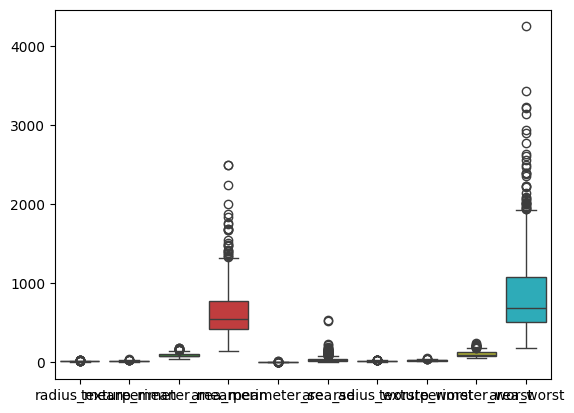

In [ ]:
sns.boxplot(data=df, x=None, y=None, hue=None, order=None, hue_order=None, orient=None, color=None, palette=None, saturation=0.75)

**We check the outlier for the Dataset & We find Some outlers. If this outliers present in the Dataset, there is a chance for wrong result & next step we will remove the outliers.**

Original dataset size: 569
Dataset size after outlier removal: 555


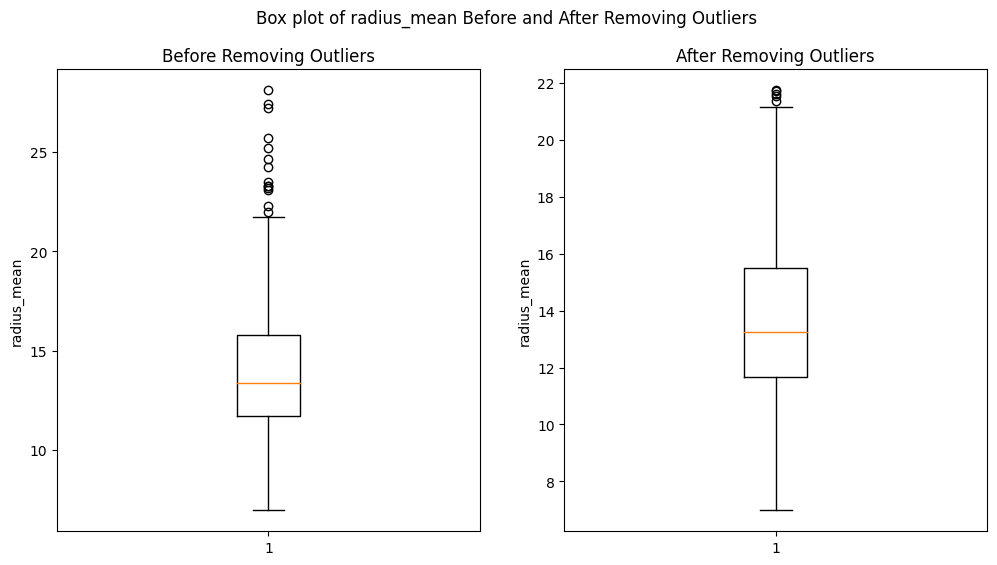

In [ ]:
Q1 = df['radius_mean'].quantile(0.25)
Q3 = df['radius_mean'].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out the outliers
data_no_outliers = df[(df['radius_mean'] >= lower_bound) & (df['radius_mean'] <= upper_bound)]
# Display the number of rows before and after outlier removal
print(f"Original dataset size: {df.shape[0]}")
print(f"Dataset size after outlier removal: {data_no_outliers.shape[0]}")
if df.shape[0] == data_no_outliers.shape[0]:
    print("No outliers were removed using the IQR method.")

# Plot the box plot for 'radius_worst' before and after removing outliers
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
fig.suptitle('Box plot of radius_mean Before and After Removing Outliers')

# Before removing outliers
axes[0].boxplot(df['radius_mean'])
axes[0].set_title('Before Removing Outliers')
axes[0].set_ylabel('radius_mean')
# After removing outliers
axes[1].boxplot(data_no_outliers['radius_mean'])
axes[1].set_title('After Removing Outliers')
axes[1].set_ylabel('radius_mean')

plt.show()

Original dataset size: 569
Dataset size after outlier removal: 562


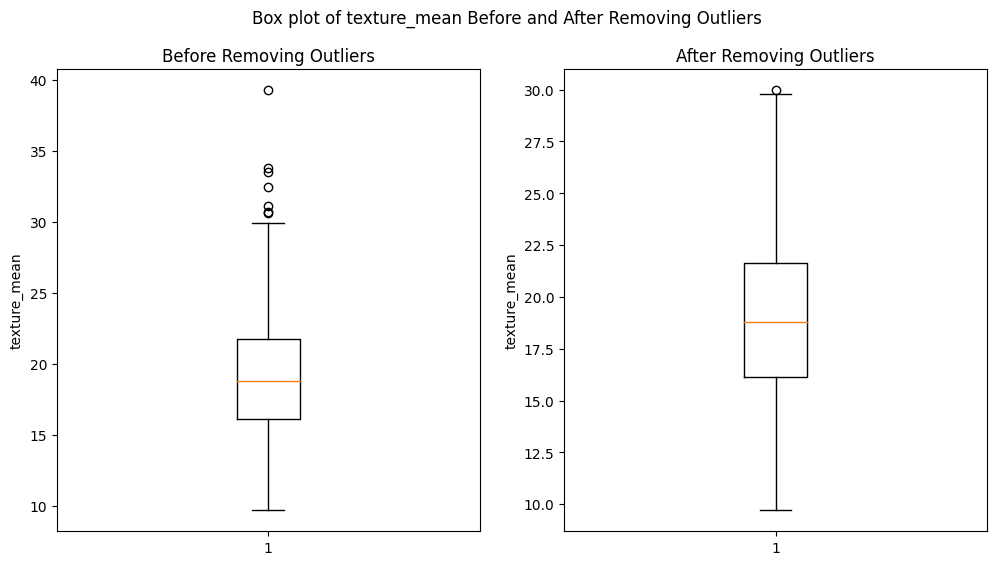

In [ ]:
Q1 = df['texture_mean'].quantile(0.25)
Q3 = df['texture_mean'].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out the outliers
data_no_outliers = df[(df['texture_mean'] >= lower_bound) & (df['texture_mean'] <= upper_bound)]
# Display the number of rows before and after outlier removal
print(f"Original dataset size: {df.shape[0]}")
print(f"Dataset size after outlier removal: {data_no_outliers.shape[0]}")
if df.shape[0] == data_no_outliers.shape[0]:
    print("No outliers were removed using the IQR method.")

# Plot the box plot for 'texture_mean' before and after removing outliers
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
fig.suptitle('Box plot of texture_mean Before and After Removing Outliers')

# Before removing outliers
axes[0].boxplot(df['texture_mean'])
axes[0].set_title('Before Removing Outliers')
axes[0].set_ylabel('texture_mean')
# After removing outliers
axes[1].boxplot(data_no_outliers['texture_mean'])
axes[1].set_title('After Removing Outliers')
axes[1].set_ylabel('texture_mean')

plt.show()

Original dataset size: 569
Dataset size after outlier removal: 556


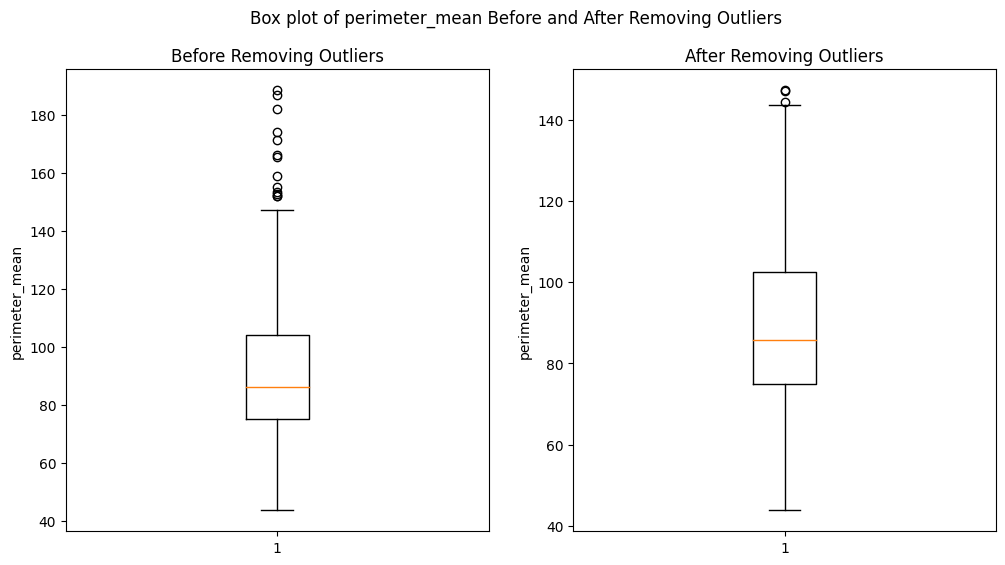

In [ ]:
Q1 = df['perimeter_mean'].quantile(0.25)
Q3 = df['perimeter_mean'].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out the outliers
data_no_outliers = df[(df['perimeter_mean'] >= lower_bound) & (df['perimeter_mean'] <= upper_bound)]
# Display the number of rows before and after outlier removal
print(f"Original dataset size: {df.shape[0]}")
print(f"Dataset size after outlier removal: {data_no_outliers.shape[0]}")
if df.shape[0] == data_no_outliers.shape[0]:
    print("No outliers were removed using the IQR method.")

# Plot the box plot for 'perimeter_mean' before and after removing outliers
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
fig.suptitle('Box plot of perimeter_mean Before and After Removing Outliers')

# Before removing outliers
axes[0].boxplot(df['perimeter_mean'])
axes[0].set_title('Before Removing Outliers')
axes[0].set_ylabel('perimeter_mean')
# After removing outliers
axes[1].boxplot(data_no_outliers['perimeter_mean'])
axes[1].set_title('After Removing Outliers')
axes[1].set_ylabel('perimeter_mean')

plt.show()

Original dataset size: 569
Dataset size after outlier removal: 544


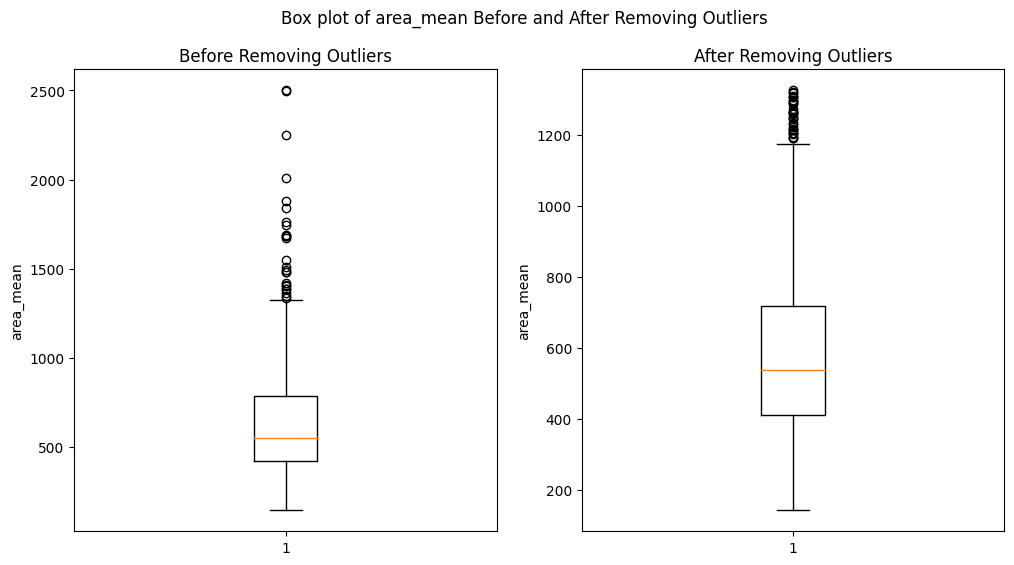

In [ ]:
Q1 = df['area_mean'].quantile(0.25)
Q3 = df['area_mean'].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out the outliers
data_no_outliers = df[(df['area_mean'] >= lower_bound) & (df['area_mean'] <= upper_bound)]
# Display the number of rows before and after outlier removal
print(f"Original dataset size: {df.shape[0]}")
print(f"Dataset size after outlier removal: {data_no_outliers.shape[0]}")
if df.shape[0] == data_no_outliers.shape[0]:
    print("No outliers were removed using the IQR method.")

# Plot the box plot for 'area_mean' before and after removing outliers
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
fig.suptitle('Box plot of area_mean Before and After Removing Outliers')

# Before removing outliers
axes[0].boxplot(df['area_mean'])
axes[0].set_title('Before Removing Outliers')
axes[0].set_ylabel('area_mean')
# After removing outliers
axes[1].boxplot(data_no_outliers['area_mean'])
axes[1].set_title('After Removing Outliers')
axes[1].set_ylabel('area_mean')

plt.show()

Original dataset size: 569
Dataset size after outlier removal: 531


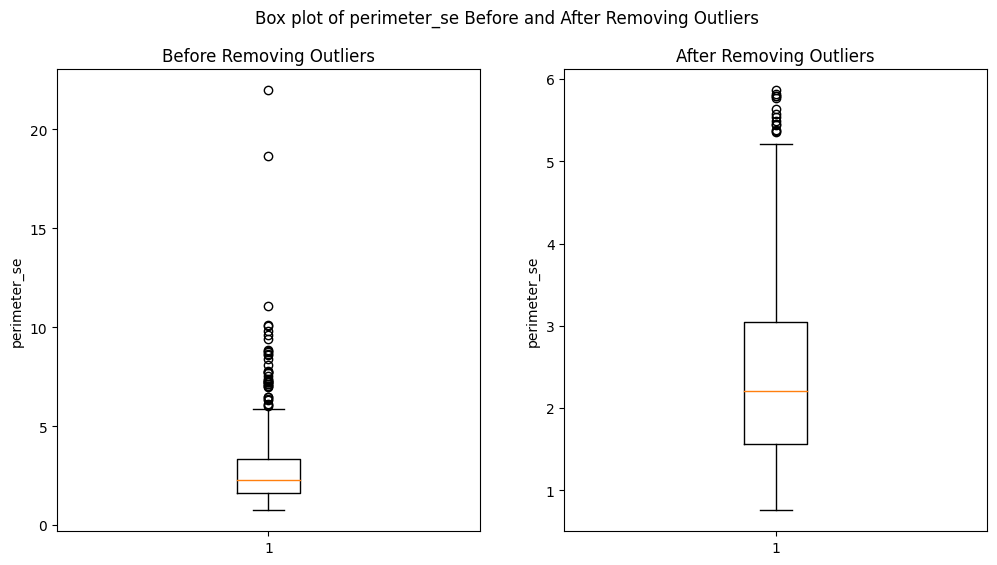

In [ ]:
Q1 = df['perimeter_se'].quantile(0.25)
Q3 = df['perimeter_se'].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out the outliers
data_no_outliers = df[(df['perimeter_se'] >= lower_bound) & (df['perimeter_se'] <= upper_bound)]
# Display the number of rows before and after outlier removal
print(f"Original dataset size: {df.shape[0]}")
print(f"Dataset size after outlier removal: {data_no_outliers.shape[0]}")
if df.shape[0] == data_no_outliers.shape[0]:
    print("No outliers were removed using the IQR method.")

# Plot the box plot for 'perimeter_se' before and after removing outliers
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
fig.suptitle('Box plot of perimeter_se Before and After Removing Outliers')

# Before removing outliers
axes[0].boxplot(df['perimeter_se'])
axes[0].set_title('Before Removing Outliers')
axes[0].set_ylabel('perimeter_se')
# After removing outliers
axes[1].boxplot(data_no_outliers['perimeter_se'])
axes[1].set_title('After Removing Outliers')
axes[1].set_ylabel('perimeter_se')

plt.show()

Original dataset size: 569
Dataset size after outlier removal: 504


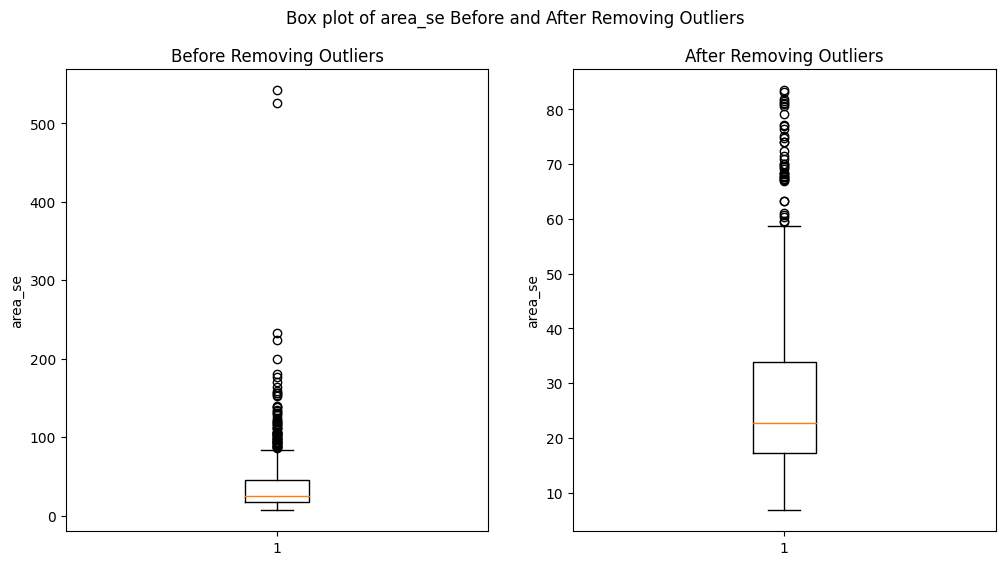

In [ ]:
Q1 = df['area_se'].quantile(0.25)
Q3 = df['area_se'].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out the outliers
data_no_outliers = df[(df['area_se'] >= lower_bound) & (df['area_se'] <= upper_bound)]
# Display the number of rows before and after outlier removal
print(f"Original dataset size: {df.shape[0]}")
print(f"Dataset size after outlier removal: {data_no_outliers.shape[0]}")
if df.shape[0] == data_no_outliers.shape[0]:
    print("No outliers were removed using the IQR method.")

# Plot the box plot for 'area_se' before and after removing outliers
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
fig.suptitle('Box plot of area_se Before and After Removing Outliers')

# Before removing outliers
axes[0].boxplot(df['area_se'])
axes[0].set_title('Before Removing Outliers')
axes[0].set_ylabel('area_se')
# After removing outliers
axes[1].boxplot(data_no_outliers['area_se'])
axes[1].set_title('After Removing Outliers')
axes[1].set_ylabel('area_se')

plt.show()

Original dataset size: 569
Dataset size after outlier removal: 552


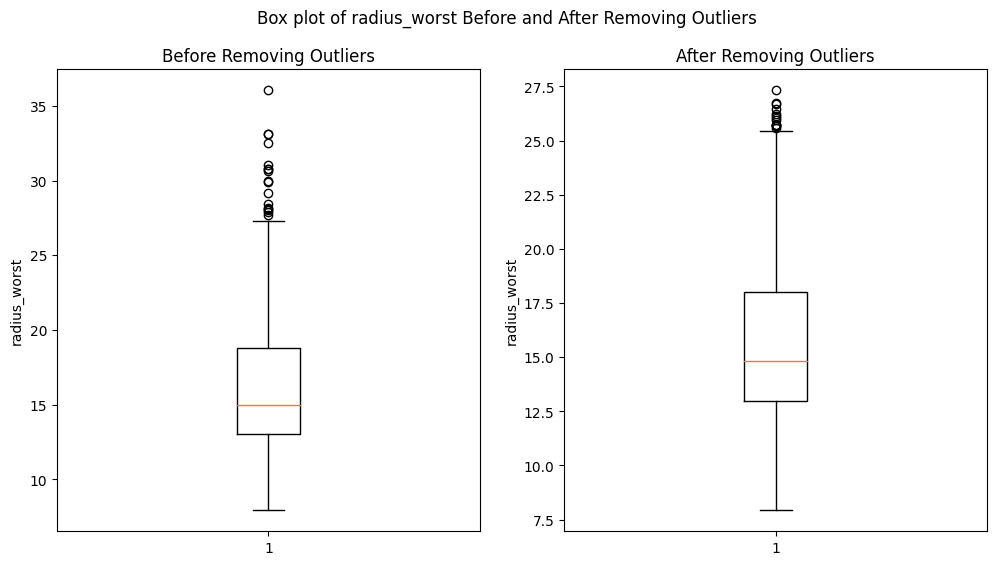

In [ ]:
Q1 = df['radius_worst'].quantile(0.25)
Q3 = df['radius_worst'].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out the outliers
data_no_outliers = df[(df['radius_worst'] >= lower_bound) & (df['radius_worst'] <= upper_bound)]
# Display the number of rows before and after outlier removal
print(f"Original dataset size: {df.shape[0]}")
print(f"Dataset size after outlier removal: {data_no_outliers.shape[0]}")
if df.shape[0] == data_no_outliers.shape[0]:
    print("No outliers were removed using the IQR method.")

# Plot the box plot for 'radius_worst' before and after removing outliers
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
fig.suptitle('Box plot of radius_worst Before and After Removing Outliers')

# Before removing outliers
axes[0].boxplot(df['radius_worst'])
axes[0].set_title('Before Removing Outliers')
axes[0].set_ylabel('radius_worst')
# After removing outliers
axes[1].boxplot(data_no_outliers['radius_worst'])
axes[1].set_title('After Removing Outliers')
axes[1].set_ylabel('radius_worst')

plt.show()

Original dataset size: 569
Dataset size after outlier removal: 564


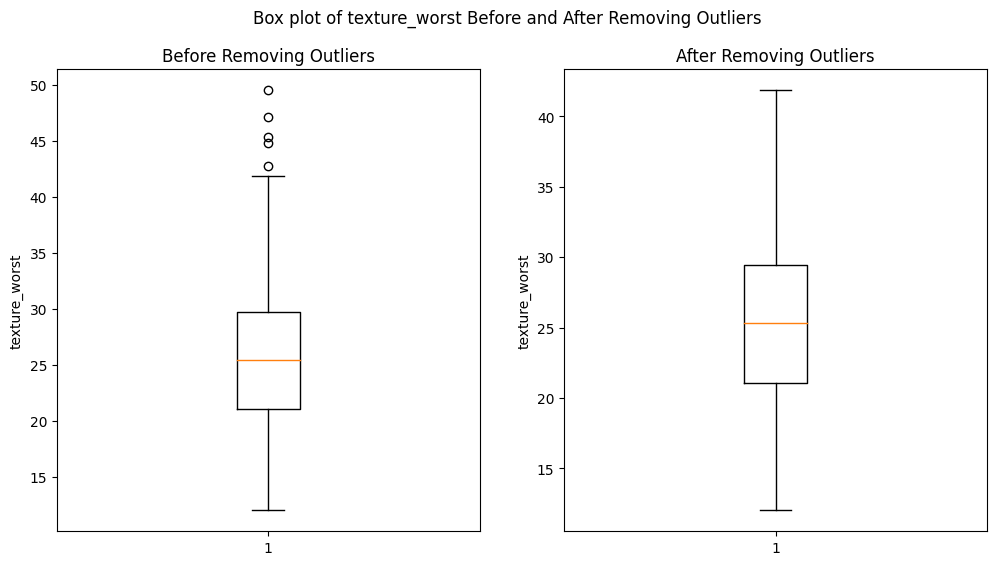

In [ ]:
Q1 = df['texture_worst'].quantile(0.25)
Q3 = df['texture_worst'].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out the outliers
data_no_outliers = df[(df['texture_worst'] >= lower_bound) & (df['texture_worst'] <= upper_bound)]
# Display the number of rows before and after outlier removal
print(f"Original dataset size: {df.shape[0]}")
print(f"Dataset size after outlier removal: {data_no_outliers.shape[0]}")
if df.shape[0] == data_no_outliers.shape[0]:
    print("No outliers were removed using the IQR method.")

# Plot the box plot for 'texture_worst' before and after removing outliers
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
fig.suptitle('Box plot of texture_worst Before and After Removing Outliers')

# Before removing outliers
axes[0].boxplot(df['texture_worst'])
axes[0].set_title('Before Removing Outliers')
axes[0].set_ylabel('texture_worst')
# After removing outliers
axes[1].boxplot(data_no_outliers['texture_worst'])
axes[1].set_title('After Removing Outliers')
axes[1].set_ylabel('texture_worst')

plt.show()

Original dataset size: 569
Dataset size after outlier removal: 554


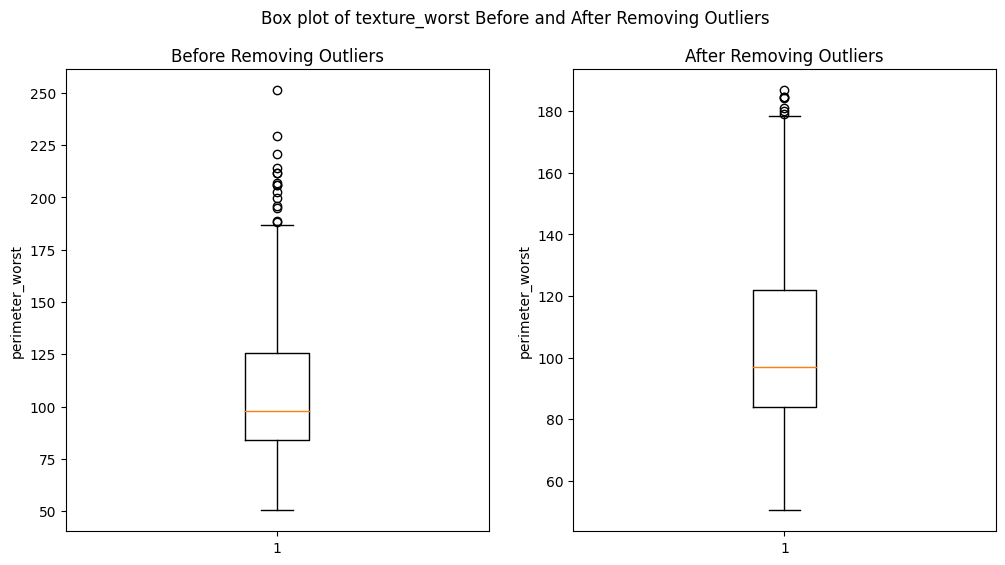

In [ ]:
Q1 = df['perimeter_worst'].quantile(0.25)
Q3 = df['perimeter_worst'].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out the outliers
data_no_outliers = df[(df['perimeter_worst'] >= lower_bound) & (df['perimeter_worst'] <= upper_bound)]
# Display the number of rows before and after outlier removal
print(f"Original dataset size: {df.shape[0]}")
print(f"Dataset size after outlier removal: {data_no_outliers.shape[0]}")
if df.shape[0] == data_no_outliers.shape[0]:
    print("No outliers were removed using the IQR method.")

# Plot the box plot for 'perimeter_worst' before and after removing outliers
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
fig.suptitle('Box plot of texture_worst Before and After Removing Outliers')

# Before removing outliers
axes[0].boxplot(df['perimeter_worst'])
axes[0].set_title('Before Removing Outliers')
axes[0].set_ylabel('perimeter_worst')
# After removing outliers
axes[1].boxplot(data_no_outliers['perimeter_worst'])
axes[1].set_title('After Removing Outliers')
axes[1].set_ylabel('perimeter_worst')

plt.show()

Original dataset size: 569
Dataset size after outlier removal: 534


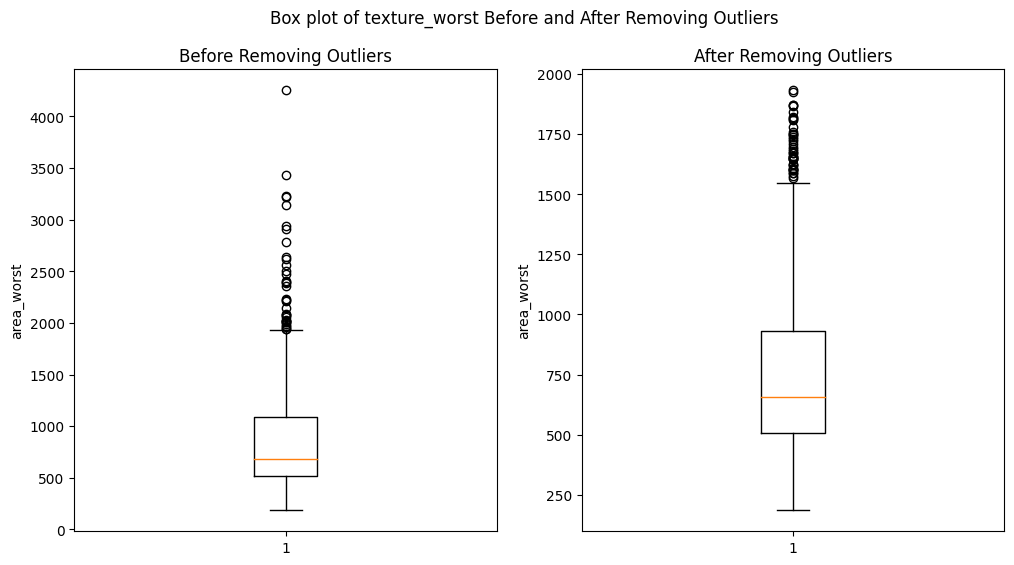

In [ ]:
Q1 = df['area_worst'].quantile(0.25)
Q3 = df['area_worst'].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out the outliers
data_no_outliers = df[(df['area_worst'] >= lower_bound) & (df['area_worst'] <= upper_bound)]
# Display the number of rows before and after outlier removal
print(f"Original dataset size: {df.shape[0]}")
print(f"Dataset size after outlier removal: {data_no_outliers.shape[0]}")
if df.shape[0] == data_no_outliers.shape[0]:
    print("No outliers were removed using the IQR method.")

# Plot the box plot for 'area_worst' before and after removing outliers
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
fig.suptitle('Box plot of texture_worst Before and After Removing Outliers')

# Before removing outliers
axes[0].boxplot(df['area_worst'])
axes[0].set_title('Before Removing Outliers')
axes[0].set_ylabel('area_worst')
# After removing outliers
axes[1].boxplot(data_no_outliers['area_worst'])
axes[1].set_title('After Removing Outliers')
axes[1].set_ylabel('area_worst')

plt.show()

# **Corelation heatmap**

**We removed the outliers from our Data set , now our Data set is outlier free.**

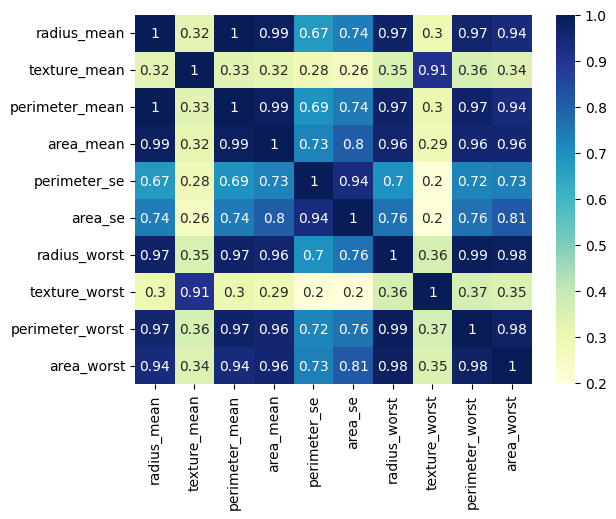

In [ ]:
numeric_df = df.select_dtypes(include=['number'])
dataplot = sns.heatmap(numeric_df.corr(), cmap="YlGnBu", annot=True)

**We check the corelation among the variable**

# **Feature Engineering**

In [ ]:
####### Replace categorical values with numbers########
print("Distribution of data: ", df['diagnosis'].value_counts())

#Define the dependent variable that needs to be predicted (labels)
y = df["diagnosis"].values
print("Labels before encoding are: ", np.unique(y))

# Encoding categorical data from text (B and M) to integers (0 and 1)
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
Y = labelencoder.fit_transform(y) # M=1 and B=0
print("Labels after encoding are: ", np.unique(Y))

Distribution of data:  diagnosis
B    357
M    212
Name: count, dtype: int64
Labels before encoding are:  ['B' 'M']
Labels after encoding are:  [0 1]


**We convert categorical Data into neumerial numbers**

# **Data Normalization/Data Scaling**

In [ ]:
#Scale / normalize the values to bring them to similar range
X=df_reduced.drop(columns=['diagnosis'])
scaler = MinMaxScaler()
scaler.fit(X)
X = scaler.transform(X)
print(X)  #Scaled values

[[0.52103744 0.0226581  0.54598853 ... 0.14152452 0.66831017 0.45069799]
 [0.64314449 0.27257355 0.61578329 ... 0.30357143 0.53981772 0.43521431]
 [0.60149557 0.3902604  0.59574321 ... 0.36007463 0.50844166 0.37450845]
 ...
 [0.45525108 0.62123774 0.44578813 ... 0.58901919 0.3799492  0.23073142]
 [0.64456434 0.66351031 0.66553797 ... 0.73027719 0.66831017 0.402035  ]
 [0.03686876 0.50152181 0.02853984 ... 0.48907249 0.04357787 0.02049744]]


**We have diffent unit & measurment system in our Dataset,If we use different
measurment system & unit, we will not get accurate result, that's why we will scale or normalized our Dataset.**

# **Train Test Split**

In [ ]:
#Split data into train and test to verify accuracy after fitting the model.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=42)
print("Shape of training data is: ", X_train.shape)
print("Shape of testing data is: ", X_test.shape)

Shape of training data is:  (455, 10)
Shape of testing data is:  (114, 10)


**The split ensures that 80%of your data (455 samples) is used for training the model, while 20% (114 samples) is reserved for testing its performance. This division helps in evaluating how well the model generalizes to new, unseen data.**

# **Building a Artificial Neural Network Model**

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout

In [ ]:
model = Sequential()
model.add(Dense(5, input_dim=10, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

print(model.summary())

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_16 (Dense)            (None, 5)                 55        
                                                                 
 dropout_8 (Dropout)         (None, 5)                 0         
                                                                 
 dense_17 (Dense)            (None, 1)                 6         
                                                                 
 activation_8 (Activation)   (None, 1)                 0         
                                                                 
Total params: 61 (244.00 Byte)
Trainable params: 61 (244.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


**The code creates a sequential neural network model with two dense layers, a dropout layer, and a sigmoid output layer. The first dense layer has 5 units and ReLU activation, the dropout rate is 0.2, and the output layer has a single unit with sigmoid activation. The model is compiled for binary classification using binary cross-entropy loss, Adam optimizer, and accuracy metric.**

# **Training the Neural Network Model**

In [ ]:
#Fit with no early stopping or other callbacks
history = model.fit(X_train, y_train, verbose=1, epochs=100, batch_size=64,
                    validation_data=(X_test, y_test))


Epoch 1/100
8/8 [==============================] - 0s 15ms/step - loss: 0.4506 - accuracy: 0.8286 - val_loss: 0.3832 - val_accuracy: 0.9298
Epoch 2/100
8/8 [==============================] - 0s 9ms/step - loss: 0.4508 - accuracy: 0.8198 - val_loss: 0.3808 - val_accuracy: 0.9386
Epoch 3/100
8/8 [==============================] - 0s 6ms/step - loss: 0.4429 - accuracy: 0.8220 - val_loss: 0.3785 - val_accuracy: 0.9474
Epoch 4/100
8/8 [==============================] - 0s 9ms/step - loss: 0.4319 - accuracy: 0.8286 - val_loss: 0.3761 - val_accuracy: 0.9474
Epoch 5/100
8/8 [==============================] - 0s 11ms/step - loss: 0.4386 - accuracy: 0.8242 - val_loss: 0.3739 - val_accuracy: 0.9474
Epoch 6/100
8/8 [==============================] - 0s 7ms/step - loss: 0.4348 - accuracy: 0.8352 - val_loss: 0.3718 - val_accuracy: 0.9474
Epoch 7/100
8/8 [==============================] - 0s 9ms/step - loss: 0.4058 - accuracy: 0.8593 - val_loss: 0.3696 - val_accuracy: 0.9474
Epoch 8/100
8/8 [========

# **Plotting Training and Validation Accuracy and Loss at Each Epoch.**

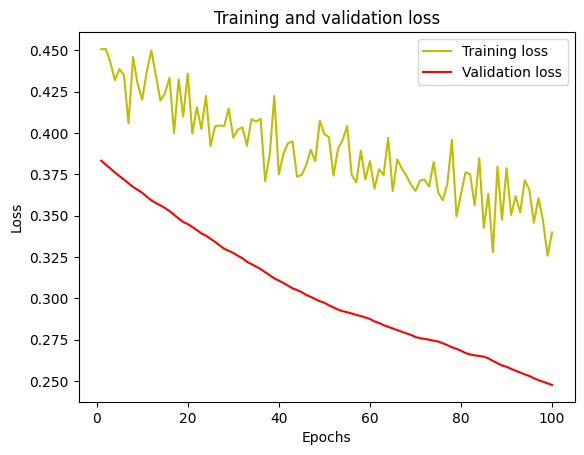

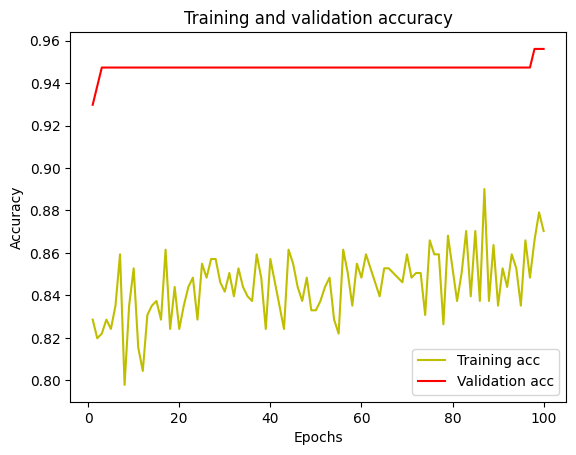

In [ ]:
#plot the training and validation accuracy and loss at each epoch
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


acc = history.history['accuracy']  #Use accuracy if acc doesn't work
val_acc = history.history['val_accuracy']  #Use val_accuracy if acc doesn't work
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

**The code plots training and validation loss and accuracy curves over epochs. Expected results: Loss curves should decrease, accuracy curves should increase. Validation metrics slightly worse than training due to generalization. Plots help identify overfitting, underfitting, and guide hyperparameter tuning..**

# **Predicting Test Set Results and Evaluating Model Performance with a Confusion Matrix.**

4/4 [==============================] - 0s 3ms/step
Classification Report:
               precision    recall  f1-score   support

           0       0.93      1.00      0.97        71
           1       1.00      0.88      0.94        43

    accuracy                           0.96       114
   macro avg       0.97      0.94      0.95       114
weighted avg       0.96      0.96      0.96       114

Precision Score: 1.0
Recal Score: 0.8837209302325582
Accuracy Score: 0.956140350877193


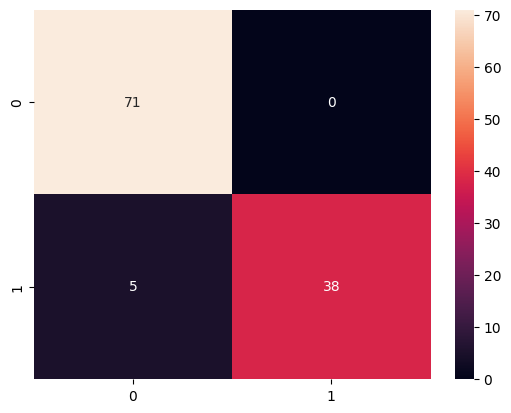

In [ ]:
# Predicting the Test set results
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True)
print('Classification Report:\n',classification_report(y_test, y_pred))
print('Precision Score:',precision_score(y_test, y_pred))
print('Recal Score:',recall_score(y_test,y_pred))
print('Accuracy Score:',accuracy_score(y_test,
y_pred))


**We can see the performance of our model, where accuracy score 95.61% , precission score 100% & recall score 88.37%.**